# **Análisis Descriptivo**

## Librerías 

In [1]:
!pip install scikit-learn==0.24.2

     |████████████████████████████████| 22.3 MB 34 kB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [2]:
!pip install unidecode

     |████████████████████████████████| 235 kB 38.3 MB/s 


In [3]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
sns.set_style("darkgrid")

## Descarga Información de GitHub

In [4]:
#Descargar datasets desde github
!git clone https://github.com/andres-soto-h/monografia-udea-eacd.git

Cloning into 'monografia-udea-eacd'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 11 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (11/11), done.


In [5]:
#Lectura del dataset transformado
df_propiedades=pd.read_csv('/content/monografia-udea-eacd/df_prop_clean_12082021.csv', delimiter=';', encoding='latin1')

In [6]:
# from google.colab import drive
# drive.mount('/content/drive/')
# %cd '/content/drive/My Drive/Colab Notebooks/Seminario/DATASETS'
# # !ls
# df_propiedades=pd.read_csv('df_prop_clean_12082021.csv', delimiter=';', encoding='latin1') 
# print(df_propiedades.shape)

In [7]:
df_propiedades.rename(columns={"municipio":"ubicacion"}, inplace=True)

In [8]:
df_propiedades['ubicacion'].value_counts()

rionegro                  1241
el retiro                  439
la ceja                    342
guarne                     196
marinilla                  117
el carmen de viboral        62
san antonio de pereira      38
llanogrande                 31
santuario                   15
la uniÃ³n                    4
Name: ubicacion, dtype: int64

**NOTA:** se decide eliminar la información del municipio de **La Unión**.

In [9]:
# mask_union = df_propiedades['ubicacion']!='la uniÃ³n'
# df_propiedades = df_propiedades[mask_union]

In [10]:
df_propiedades['ubicacion']=df_propiedades['ubicacion'].apply(lambda x: x.replace('la uniÃ³n','la union'))

## Descripción

**Dimensión Conjunto de Datos**

In [11]:
df_propiedades.shape

(2485, 184)

In [12]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [13]:
some_stats = df_propiedades[['precio','area_m2','habitaciones','banos','estrato']].describe()
some_stats

,precio,area_m2,habitaciones,banos
count,2485.0,2485.0,2485.0,2485.0
mean,720797674.6,7161.5,3.2,2.9
std,573546483.5,212576.1,1.1,1.3
min,95000000.0,2.9,1.0,1.0
25%,320000000.0,75.0,3.0,2.0
50%,490000000.0,146.0,3.0,3.0
75%,930000000.0,349.0,4.0,4.0
max,2500000000.0,10000000.0,13.0,12.0


In [14]:
some_stats.to_excel('stats.xlsx')

In [15]:
#Propiedad mas barata
df_propiedades[df_propiedades['precio']<=95000000]

,tipo,url,titulo,precio,area_m2,habitaciones,banos,garajes,descripcion,antiguedad,balcon,bano_auxiliar,comedor,estudio,servicios_publicos,ventilacion_natural,zona_de_lavanderia,en_conjunto_cerrado,garaje_parqueadero(s),gimnasio,piscina,salon_comunal,vivienda_multifamiliar,zona_infantil,zonas_verdes,bombas_de_gasolina,cerca_centro_comercial,comodas_vias_de_acceso,restaurantes,seguridad,supermercados_ccomerciales,trans_publico_cercano,caractint,caractext,caractsec,otros_datos,latitud,longitud,bano_independiente,closet,...,gabinete_de_incendios,ascensor(es)_inteligente(s),industrial,banos_comunales,banos_mixtos,control_de_acceso_digital,servicios_independientes,vivienda_bifamiliar,rociadores_de_agua,finca_ganadera,corrales,cuarto_de_conductores,con_casa_club,finca_agricola,finca_agroganadera,cableado_de_red,puerta_de_seguridad,puerta_electrica,mezzanine,esquinero,acceso_para_camiones,sensor_de_movimiento,auditorio,patio_interno,cuarto_de_servicio.1,cuarto_de_escoltas,panoramica_un_lado,cocineta,finca_avicola,piso_en_alfombra,jaula_de_golf,con_cerca_electrica,oficinas_administrativas,salon_de_videoconferencias,pasaje_comercial,en_club,con_casa_prefabricada,finca_cafetera,ubicacion,tipo_propiedad
2122,Usada,https://www.fincaraiz.com.co/apartaestudio-en-...,Apartaestudio en Venta Guarne Punto Mayor Mall,95000000.0,24.0,1.0,1.0,0.0,Se Vende Confortable aparta oficina ubicada fr...,1 a 8 aÃ±os,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"['BaÃ±o Independiente', 'Shut de basura']","['BahÃ­a exterior de parqueo', 'En conjunto ce...","['Parques cercanos', 'Sobre vÃ­a principal', '...","{'AdvertId': '5875190', 'AdvertWASId': '587519...",6.3,-75.4,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,guarne,apartaestudio


In [16]:
#Propiedad mas costosa
df_propiedades[df_propiedades['precio']>=2500000000]['tipo_propiedad'].value_counts()

finca    11
casa      9
Name: tipo_propiedad, dtype: int64

In [17]:
df_propiedades[df_propiedades['precio']>=2500000000].describe()

,precio,area_m2,habitaciones,banos,garajes,balcon,bano_auxiliar,comedor,estudio,servicios_publicos,ventilacion_natural,zona_de_lavanderia,en_conjunto_cerrado,garaje_parqueadero(s),gimnasio,piscina,salon_comunal,vivienda_multifamiliar,zona_infantil,zonas_verdes,bombas_de_gasolina,cerca_centro_comercial,comodas_vias_de_acceso,restaurantes,seguridad,supermercados_ccomerciales,trans_publico_cercano,latitud,longitud,bano_independiente,closet,cocina_integral,cocina_tipo_americano,instalacion_de_gas,acceso_pavimentado,canchas_deportivas,garaje(s),cerca_de_zona_urbana,parques_cercanos,zona_comercial,...,cocina_de_lena,escalera_de_emergencia,gabinete_de_incendios,ascensor(es)_inteligente(s),industrial,banos_comunales,banos_mixtos,control_de_acceso_digital,servicios_independientes,vivienda_bifamiliar,rociadores_de_agua,finca_ganadera,corrales,cuarto_de_conductores,con_casa_club,finca_agricola,finca_agroganadera,cableado_de_red,puerta_de_seguridad,puerta_electrica,mezzanine,esquinero,acceso_para_camiones,sensor_de_movimiento,auditorio,patio_interno,cuarto_de_servicio.1,cuarto_de_escoltas,panoramica_un_lado,cocineta,finca_avicola,piso_en_alfombra,jaula_de_golf,con_cerca_electrica,oficinas_administrativas,salon_de_videoconferencias,pasaje_comercial,en_club,con_casa_prefabricada,finca_cafetera
count,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0
mean,2500000000.0,3023.3,4.5,4.5,3.0,0.4,0.2,0.1,0.2,0.3,0.2,0.3,0.3,0.2,0.1,0.1,0.1,0.0,0.0,0.3,0.0,0.0,0.1,0.0,0.1,0.2,0.5,4.6,-56.6,0.1,0.3,0.6,0.2,0.2,0.3,0.1,0.2,0.3,0.2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,4421.2,1.2,1.4,2.8,0.5,0.4,0.2,0.4,0.5,0.4,0.5,0.5,0.4,0.2,0.3,0.3,0.0,0.0,0.5,0.0,0.0,0.3,0.0,0.4,0.4,0.5,2.7,33.5,0.4,0.5,0.5,0.4,0.4,0.5,0.2,0.4,0.5,0.4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,2500000000.0,180.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-75.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2500000000.0,513.0,3.8,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,-75.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,2500000000.0,867.5,4.5,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,6.1,-75.4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,2500000000.0,2875.0,5.0,5.2,4.0,1.0,0.2,0.0,0.2,1.0,0.2,1.0,1.0,0.2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.2,-56.5,0.0,1.0,1.0,0.0,0.2,1.0,0.0,0.2,1.0,0.2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,2500000000.0,16850.0,7.0,7.0,10.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,6.3,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [18]:
df_propiedades[df_propiedades['area_m2']>=10000000]

,tipo,url,titulo,precio,area_m2,habitaciones,banos,garajes,descripcion,antiguedad,balcon,bano_auxiliar,comedor,estudio,servicios_publicos,ventilacion_natural,zona_de_lavanderia,en_conjunto_cerrado,garaje_parqueadero(s),gimnasio,piscina,salon_comunal,vivienda_multifamiliar,zona_infantil,zonas_verdes,bombas_de_gasolina,cerca_centro_comercial,comodas_vias_de_acceso,restaurantes,seguridad,supermercados_ccomerciales,trans_publico_cercano,caractint,caractext,caractsec,otros_datos,latitud,longitud,bano_independiente,closet,...,gabinete_de_incendios,ascensor(es)_inteligente(s),industrial,banos_comunales,banos_mixtos,control_de_acceso_digital,servicios_independientes,vivienda_bifamiliar,rociadores_de_agua,finca_ganadera,corrales,cuarto_de_conductores,con_casa_club,finca_agricola,finca_agroganadera,cableado_de_red,puerta_de_seguridad,puerta_electrica,mezzanine,esquinero,acceso_para_camiones,sensor_de_movimiento,auditorio,patio_interno,cuarto_de_servicio.1,cuarto_de_escoltas,panoramica_un_lado,cocineta,finca_avicola,piso_en_alfombra,jaula_de_golf,con_cerca_electrica,oficinas_administrativas,salon_de_videoconferencias,pasaje_comercial,en_club,con_casa_prefabricada,finca_cafetera,ubicacion,tipo_propiedad
1772,Usada,https://www.fincaraiz.com.co/finca-en-venta/ri...,Finca en Venta Rionegro Llano Grande,1700000000.0,10000000.0,5.0,2.0,10.0,CÃ³digo Arrendamientos Santa Fe V8509 Ubicada ...,9 a 15 aÃ±os,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"['Cocina Integral', 'Piso en Baldosa / MÃ¡rmo...","['Garaje / Parqueadero(s)', 'Kiosko', 'Pesebre...","['Ãrea Rural', 'Cerca de Zona Urbana']","{'AdvertId': '5095430', 'AdvertWASId': '509543...",6.1,-75.4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,rionegro,finca


**Cantidad de propiedades por municipio**

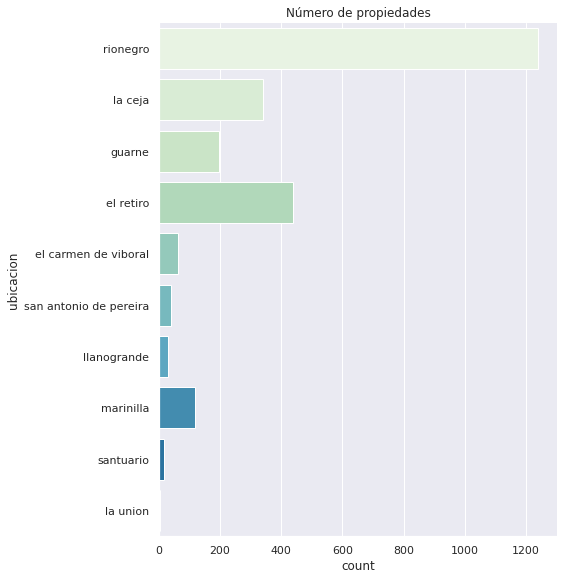

In [19]:
sns.catplot(y="ubicacion", kind="count",  data=df_propiedades, height=8, palette="GnBu")
plt.title("Número de propiedades");

**Porcentaje de Población por Tipo de Inmueble**

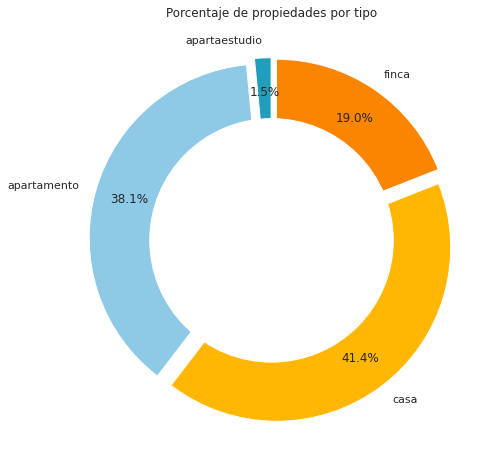

In [20]:
# Pie chart
df_propiedades['inmuebles']=1
data = df_propiedades.groupby("tipo_propiedad")['inmuebles'].sum()
colors = ['#219EBC','#8ECAE6','#FFB703','#FB8500']
explode = (0.05,0.05,0.05,0.05)
 
plt.figure(figsize=(8,8))
plt.pie(list(data), colors = colors, labels=list(data.index), autopct='%1.1f%%', startangle=90, pctdistance=0.8, explode = explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# ax1.xaxis.label.set_color('white')
# ax1.axis('equal')  
plt.title("Porcentaje de propiedades por tipo");
plt.show()

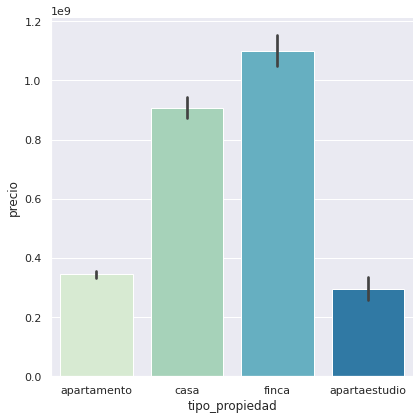

In [21]:
sns.catplot(x = "tipo_propiedad", y = "precio", kind = "bar", data = df_propiedades, palette="GnBu", height=6);

**Estado de la Vivienda**

In [22]:
df_propiedades['tipo'].value_counts()

Usada    2376
Nueva     109
Name: tipo, dtype: int64

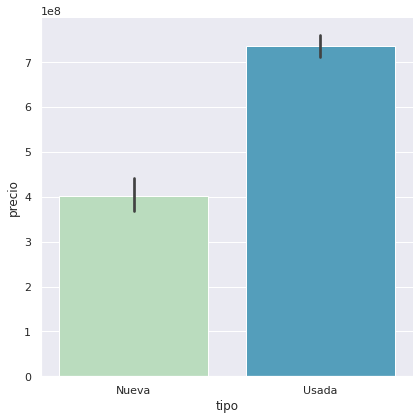

In [23]:
sns.catplot(x = "tipo", y = "precio", kind = "bar", data = df_propiedades, palette="GnBu", height=6);

**Distribución precio de la vivienda**

In [24]:
# plt.title('Distribución Precio de la Vivienda')
# plt.xlabel('Precio (Millones)')
# sns.distplot(df_propiedades['precio']/1000000)

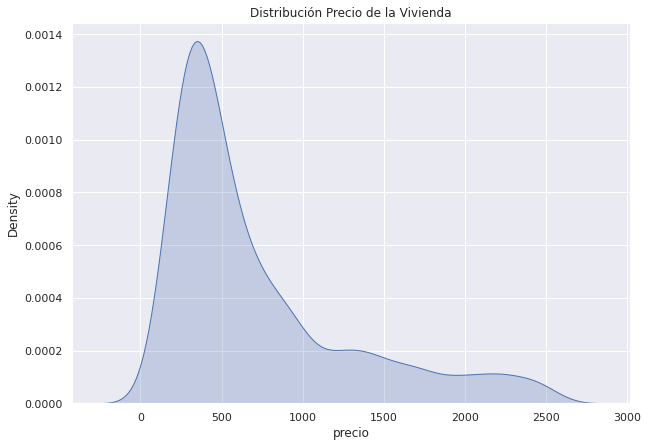

In [25]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 10,7

plt.title('Distribución Precio de la Vivienda')
sns.kdeplot(data=df_propiedades['precio']/1000000, shade=True);

In [26]:
print('Información expresada en millones de pesos')
(df_propiedades['precio']/1000000).describe()

Información expresada en millones de pesos


count   2485.0
mean     720.8
std      573.5
min       95.0
25%      320.0
50%      490.0
75%      930.0
max     2500.0
Name: precio, dtype: float64

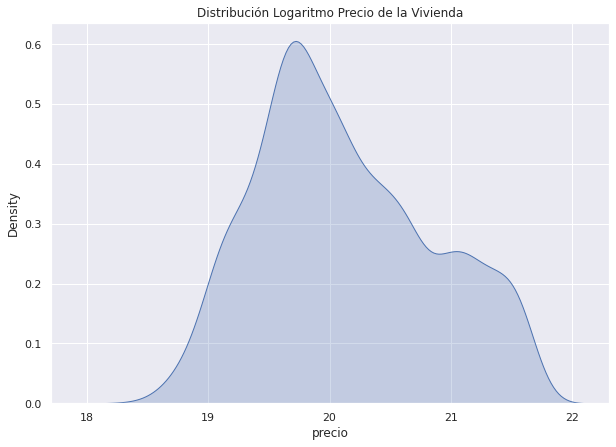

In [27]:
plt.title('Distribución Logaritmo Precio de la Vivienda')
ln_precio = np.log(df_propiedades['precio'])
ln_precio = np.log1p(df_propiedades['precio'])
sns.kdeplot(ln_precio, shade=True);

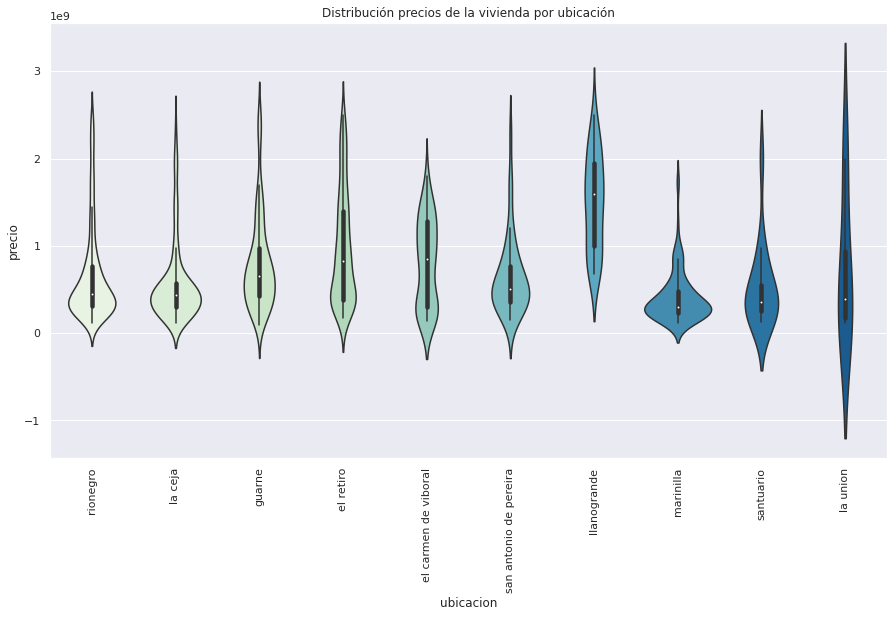

In [28]:
plt.figure(figsize=(15,8))
sns.violinplot(data=df_propiedades, x='ubicacion', y='precio',palette="GnBu")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title("Distribución precios de la vivienda por ubicación");

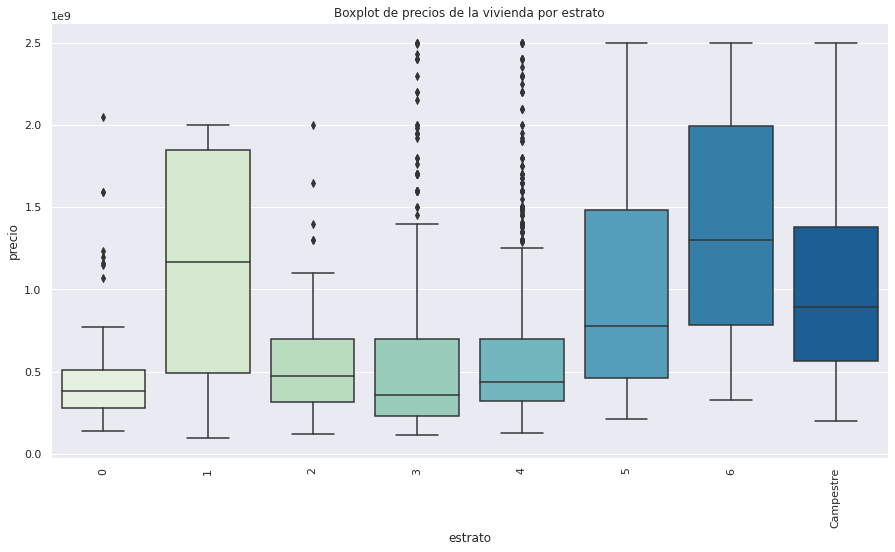

In [29]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_propiedades.sort_values(by='estrato', ascending=True), x='estrato', y='precio',palette="GnBu")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title("Boxplot de precios de la vivienda por estrato");

In [30]:
df_propiedades[df_propiedades['estrato']=='1'].describe()

,precio,area_m2,habitaciones,banos,garajes,balcon,bano_auxiliar,comedor,estudio,servicios_publicos,ventilacion_natural,zona_de_lavanderia,en_conjunto_cerrado,garaje_parqueadero(s),gimnasio,piscina,salon_comunal,vivienda_multifamiliar,zona_infantil,zonas_verdes,bombas_de_gasolina,cerca_centro_comercial,comodas_vias_de_acceso,restaurantes,seguridad,supermercados_ccomerciales,trans_publico_cercano,latitud,longitud,bano_independiente,closet,cocina_integral,cocina_tipo_americano,instalacion_de_gas,acceso_pavimentado,canchas_deportivas,garaje(s),cerca_de_zona_urbana,parques_cercanos,zona_comercial,...,escalera_de_emergencia,gabinete_de_incendios,ascensor(es)_inteligente(s),industrial,banos_comunales,banos_mixtos,control_de_acceso_digital,servicios_independientes,vivienda_bifamiliar,rociadores_de_agua,finca_ganadera,corrales,cuarto_de_conductores,con_casa_club,finca_agricola,finca_agroganadera,cableado_de_red,puerta_de_seguridad,puerta_electrica,mezzanine,esquinero,acceso_para_camiones,sensor_de_movimiento,auditorio,patio_interno,cuarto_de_servicio.1,cuarto_de_escoltas,panoramica_un_lado,cocineta,finca_avicola,piso_en_alfombra,jaula_de_golf,con_cerca_electrica,oficinas_administrativas,salon_de_videoconferencias,pasaje_comercial,en_club,con_casa_prefabricada,finca_cafetera,inmuebles
count,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
mean,1127436952.2,232301.0,2.2,1.8,0.3,0.0,0.0,0.0,0.0,0.2,0.3,0.2,0.2,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.7,5.1,-62.8,0.2,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.7,0.5,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2,0.0,0.0,0.2,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
std,813951966.5,297809.3,1.3,1.6,0.5,0.0,0.0,0.0,0.0,0.4,0.5,0.4,0.4,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.5,2.5,30.8,0.4,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.4,0.0,0.0,0.4,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,95000000.0,24.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-75.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25%,490000000.0,582.5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,5.9,-75.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
50%,1164810856.5,128754.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.1,-75.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
75%,1847405428.2,364000.0,3.0,1.8,0.8,0.0,0.0,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.2,-75.3,0.0,0.0,0.8,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
max,2000000000.0,736000.0,4.0,5.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,6.3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [31]:
df_propiedades[df_propiedades['estrato']=='1']

,tipo,url,titulo,precio,area_m2,habitaciones,banos,garajes,descripcion,antiguedad,balcon,bano_auxiliar,comedor,estudio,servicios_publicos,ventilacion_natural,zona_de_lavanderia,en_conjunto_cerrado,garaje_parqueadero(s),gimnasio,piscina,salon_comunal,vivienda_multifamiliar,zona_infantil,zonas_verdes,bombas_de_gasolina,cerca_centro_comercial,comodas_vias_de_acceso,restaurantes,seguridad,supermercados_ccomerciales,trans_publico_cercano,caractint,caractext,caractsec,otros_datos,latitud,longitud,bano_independiente,closet,...,ascensor(es)_inteligente(s),industrial,banos_comunales,banos_mixtos,control_de_acceso_digital,servicios_independientes,vivienda_bifamiliar,rociadores_de_agua,finca_ganadera,corrales,cuarto_de_conductores,con_casa_club,finca_agricola,finca_agroganadera,cableado_de_red,puerta_de_seguridad,puerta_electrica,mezzanine,esquinero,acceso_para_camiones,sensor_de_movimiento,auditorio,patio_interno,cuarto_de_servicio.1,cuarto_de_escoltas,panoramica_un_lado,cocineta,finca_avicola,piso_en_alfombra,jaula_de_golf,con_cerca_electrica,oficinas_administrativas,salon_de_videoconferencias,pasaje_comercial,en_club,con_casa_prefabricada,finca_cafetera,ubicacion,tipo_propiedad,inmuebles
3,Usada,https://www.fincaraiz.com.co/finca-en-venta/ri...,Finca en Venta Rionegro RIONEGRO,1389621713.0,274.0,4.0,5.0,0.0,815-1116 D.C COLOMBIA S.A.S vende finca de un ...,16 a 30 aÃ±os,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"['Cocina Integral', 'Patio', 'Zona de lavander...","['Alcantarillado', 'Ãrboles frutales', 'BaÃ±o...","['Ãrea Rural', 'Cerca de Zona Urbana', 'Trans...","{'AdvertId': '5730990', 'AdvertWASId': '573099...",6.1,-75.4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,rionegro,finca,1
314,Usada,https://www.fincaraiz.com.co/finca-en-venta/el...,Finca en Venta El Carmen de Viboral el Carmen,940000000.0,256000.0,3.0,1.0,1.0,Vendo finca agroindustrial en el Carmen de Vib...,MÃ¡s de 30 aÃ±os,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"['Cocina de leÃ±a', 'Finca agrÃ­cola', 'Finca ...","['Ãrboles frutales', 'BÃ³sque nativo', 'Corra...","['Ãrea Rural', 'Cerca de Zona Urbana', 'Nacim...","{'AdvertId': '6349153', 'AdvertWASId': '634915...",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,el carmen de viboral,finca,1
722,Usada,https://www.fincaraiz.com.co/finca-en-venta/la...,Finca en Venta La UniÃ³n Mesopotania,2000000000.0,736000.0,3.0,2.0,1.0,LINDA FINCA PRODUCTIVA CERTIFICADA PARA SEMBRA...,9 a 15 aÃ±os,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,[],[],"['Ãrea Rural', 'Cerca de Zona Urbana', 'Nacim...","{'AdvertId': '5777076', 'AdvertWASId': '577707...",5.9,-75.3,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,la union,finca,1
1102,Usada,https://www.fincaraiz.com.co/finca-en-venta/sa...,Finca en Venta Santuario Vereda El Salto,2000000000.0,400000.0,1.0,1.0,0.0,hermosa finca de 40 hectÃ¡reas aprox en la Ver...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[],[],[],"{'AdvertId': '6508379', 'AdvertWASId': '650837...",6.1,-75.3,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,santuario,finca,1
1770,Usada,https://www.fincaraiz.com.co/finca-en-venta/gu...,Finca en Venta Guarne Vereda Chaparral,340000000.0,1508.0,1.0,1.0,0.0,"Finca en parcelaciÃ³n familiar, a 800m de la a...",1 a 8 aÃ±os,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"['Cocina Integral', 'Piso en Baldosa / MÃ¡rmo

In [32]:
df_propiedades[(df_propiedades['estrato']=='3') & (df_propiedades['precio']>700000000)].describe()

,precio,area_m2,habitaciones,banos,garajes,balcon,bano_auxiliar,comedor,estudio,servicios_publicos,ventilacion_natural,zona_de_lavanderia,en_conjunto_cerrado,garaje_parqueadero(s),gimnasio,piscina,salon_comunal,vivienda_multifamiliar,zona_infantil,zonas_verdes,bombas_de_gasolina,cerca_centro_comercial,comodas_vias_de_acceso,restaurantes,seguridad,supermercados_ccomerciales,trans_publico_cercano,latitud,longitud,bano_independiente,closet,cocina_integral,cocina_tipo_americano,instalacion_de_gas,acceso_pavimentado,canchas_deportivas,garaje(s),cerca_de_zona_urbana,parques_cercanos,zona_comercial,...,escalera_de_emergencia,gabinete_de_incendios,ascensor(es)_inteligente(s),industrial,banos_comunales,banos_mixtos,control_de_acceso_digital,servicios_independientes,vivienda_bifamiliar,rociadores_de_agua,finca_ganadera,corrales,cuarto_de_conductores,con_casa_club,finca_agricola,finca_agroganadera,cableado_de_red,puerta_de_seguridad,puerta_electrica,mezzanine,esquinero,acceso_para_camiones,sensor_de_movimiento,auditorio,patio_interno,cuarto_de_servicio.1,cuarto_de_escoltas,panoramica_un_lado,cocineta,finca_avicola,piso_en_alfombra,jaula_de_golf,con_cerca_electrica,oficinas_administrativas,salon_de_videoconferencias,pasaje_comercial,en_club,con_casa_prefabricada,finca_cafetera,inmuebles
count,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,...,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0
mean,1233165467.6,77612.8,3.9,3.2,2.7,0.3,0.2,0.1,0.1,0.3,0.2,0.3,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.0,0.1,0.0,0.1,0.1,0.4,4.8,-58.6,0.2,0.3,0.5,0.0,0.1,0.3,0.0,0.2,0.4,0.3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
std,499917175.7,847783.6,1.4,1.3,2.8,0.4,0.4,0.2,0.3,0.5,0.4,0.4,0.1,0.5,0.1,0.1,0.0,0.1,0.2,0.5,0.2,0.1,0.3,0.1,0.3,0.3,0.5,2.6,31.5,0.4,0.5,0.5,0.2,0.3,0.5,0.1,0.4,0.5,0.4,0.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,720000000.0,80.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-77.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25%,850000000.0,297.5,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,-75.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
50%,1040000000.0,3000.0,4.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.1,-75.4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
75%,1600000000.0,7176.0,5.0,4.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.2,-75.3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
max,2500000000.0,10000000.0,10.0,7.0,10.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.9,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0

In [33]:
df_propiedades[(df_propiedades['estrato']=='4') & (df_propiedades['precio']>700000000)].describe()

,precio,area_m2,habitaciones,banos,garajes,balcon,bano_auxiliar,comedor,estudio,servicios_publicos,ventilacion_natural,zona_de_lavanderia,en_conjunto_cerrado,garaje_parqueadero(s),gimnasio,piscina,salon_comunal,vivienda_multifamiliar,zona_infantil,zonas_verdes,bombas_de_gasolina,cerca_centro_comercial,comodas_vias_de_acceso,restaurantes,seguridad,supermercados_ccomerciales,trans_publico_cercano,latitud,longitud,bano_independiente,closet,cocina_integral,cocina_tipo_americano,instalacion_de_gas,acceso_pavimentado,canchas_deportivas,garaje(s),cerca_de_zona_urbana,parques_cercanos,zona_comercial,...,escalera_de_emergencia,gabinete_de_incendios,ascensor(es)_inteligente(s),industrial,banos_comunales,banos_mixtos,control_de_acceso_digital,servicios_independientes,vivienda_bifamiliar,rociadores_de_agua,finca_ganadera,corrales,cuarto_de_conductores,con_casa_club,finca_agricola,finca_agroganadera,cableado_de_red,puerta_de_seguridad,puerta_electrica,mezzanine,esquinero,acceso_para_camiones,sensor_de_movimiento,auditorio,patio_interno,cuarto_de_servicio.1,cuarto_de_escoltas,panoramica_un_lado,cocineta,finca_avicola,piso_en_alfombra,jaula_de_golf,con_cerca_electrica,oficinas_administrativas,salon_de_videoconferencias,pasaje_comercial,en_club,con_casa_prefabricada,finca_cafetera,inmuebles
count,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,...,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0
mean,1310351086.2,2374.7,3.9,4.0,2.2,0.3,0.3,0.1,0.2,0.3,0.2,0.3,0.1,0.4,0.0,0.0,0.0,0.0,0.1,0.3,0.1,0.1,0.1,0.0,0.1,0.2,0.6,4.6,-56.0,0.1,0.3,0.6,0.1,0.2,0.3,0.0,0.2,0.5,0.3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
std,485112346.1,3398.4,1.0,1.3,2.0,0.5,0.4,0.2,0.4,0.5,0.4,0.5,0.4,0.5,0.2,0.2,0.2,0.1,0.3,0.5,0.3,0.2,0.3,0.1,0.4,0.4,0.5,3.0,33.1,0.4,0.5,0.5,0.3,0.4,0.5,0.2,0.4,0.5,0.5,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.1,0.0,0.0,0.1,0.1,0.1,0.1,0.1,0.1,0.2,0.1,0.0,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.1,0.0
min,720000000.0,90.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-14.7,-77.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25%,930000000.0,250.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-75.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
50%,1200000000.0,512.0,4.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.1,-75.4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
75%,1500000000.0,3308.2,4.0,5.0,3.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.2,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
max,2500000000.0,21500.0,10.0,10.0,10.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.9,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1

In [34]:
#Precio de la vivienda mediana/promedio por municipio
print('Mediana de los precios de la vivienda por ubicación')
print((df_propiedades.groupby(['tipo_propiedad','ubicacion'])['precio'].quantile()/1000000))
print('**********************************')

Mediana de los precios de la vivienda por ubicación
tipo_propiedad  ubicacion             
apartaestudio   el retiro                 300.0
                guarne                    132.2
                la ceja                   205.0
                marinilla                 230.0
                rionegro                  305.0
apartamento     el carmen de viboral      195.0
                el retiro                 380.0
                guarne                    216.0
                la ceja                   232.5
                la union                  120.0
                llanogrande               825.7
                marinilla                 275.8
                rionegro                  320.0
                san antonio de pereira    355.7
                santuario                 130.0
casa            el carmen de viboral      500.0
                el retiro                1200.0
                guarne                    620.0
                la ceja                   480

In [35]:
#Precio de la vivienda mediana/promedio por municipio
print('**********************************')
print('Precio promedio de la vivienda por ubicación')
print((df_propiedades.groupby(['tipo_propiedad','ubicacion'])['precio'].mean()/1000000))

**********************************
Precio promedio de la vivienda por ubicación
tipo_propiedad  ubicacion             
apartaestudio   el retiro                 324.6
                guarne                    132.2
                la ceja                   205.0
                marinilla                 191.7
                rionegro                  320.1
apartamento     el carmen de viboral      211.9
                el retiro                 436.9
                guarne                    250.2
                la ceja                   243.8
                la union                  120.0
                llanogrande              1007.4
                marinilla                 253.3
                rionegro                  341.6
                san antonio de pereira    339.0
                santuario                 130.0
casa            el carmen de viboral      772.0
                el retiro                1308.9
                guarne                    834.5
                l

In [36]:
# (df_propiedades.groupby(['tipo_propiedad','ubicacion'])['precio'].mean()/1000000).to_excel('precio_ubicacion.xlsx')

Text(0.5, 1.0, 'Distribución precios de la vivienda por ubicación')

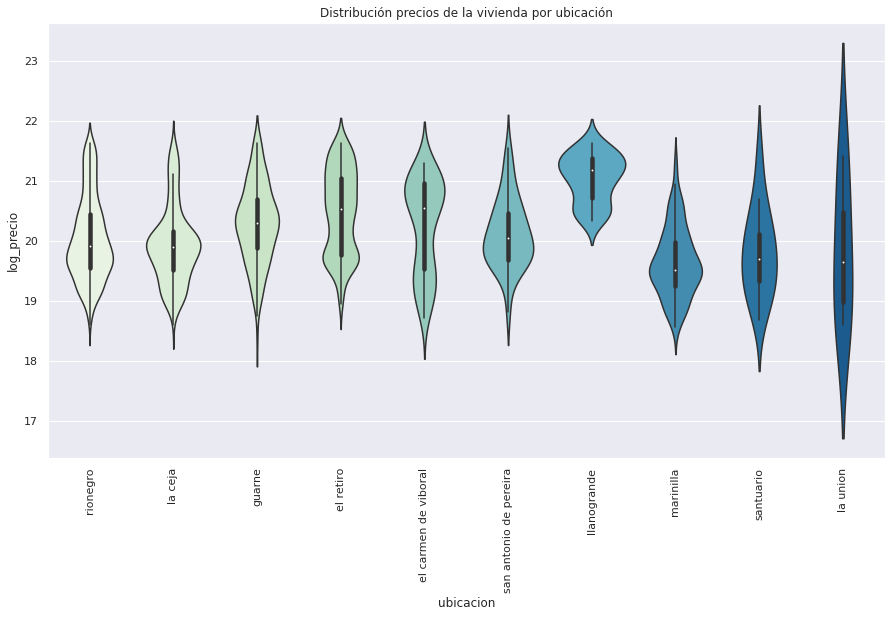

In [37]:
plt.figure(figsize=(15,8))
df_propiedades['log_precio']=ln_precio
sns.violinplot(data=df_propiedades, x='ubicacion', y='log_precio', palette="GnBu")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title("Distribución precios de la vivienda por ubicación")

In [38]:
# df_propiedades

Text(0.5, 1.0, 'Distribución precios de la vivienda por tipo de vivienda')

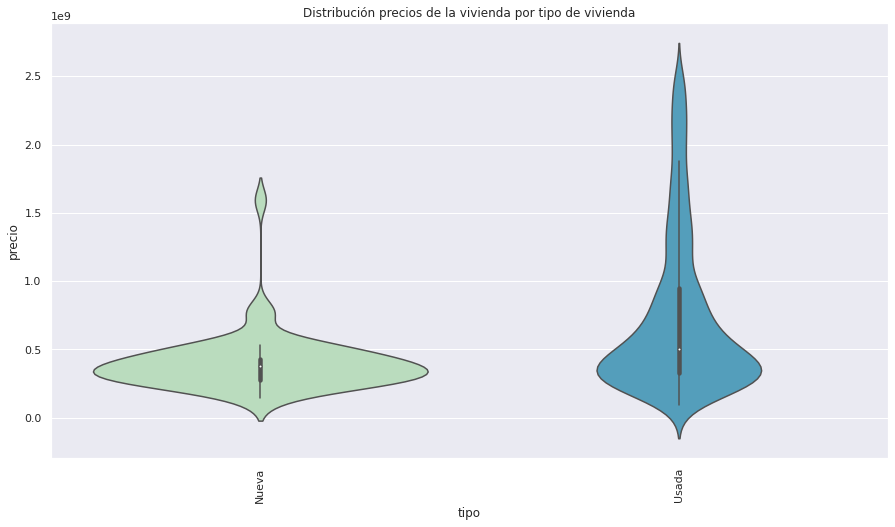

In [39]:
plt.figure(figsize=(15,8))
# df_propiedades['log_precio']=ln_precio
sns.violinplot(data=df_propiedades, x='tipo', y='precio', palette="GnBu")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title("Distribución precios de la vivienda por tipo de vivienda")

In [40]:
df_propiedades['antiguedad'].value_counts()

1 a 8 aÃ±os         1032
0                    627
Menos de 1 aÃ±o      339
9 a 15 aÃ±os         252
16 a 30 aÃ±os        187
MÃ¡s de 30 aÃ±os      48
Name: antiguedad, dtype: int64